# Sympy

In [4]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Let us import everything from sympy. We will also enable pretty printing.

In [5]:
from sympy import *
init_printing()

We must define symbols which will be treated symbolically

In [6]:
x = symbols('x')
type(x)

sympy.core.symbol.Symbol

Let us define an expression

In [7]:
f = x*sin(pi*x) + tan(pi*x)
print(f)

x*sin(pi*x) + tan(pi*x)


**Differentiation**. We can perform symbolic differentiation.

In [8]:
diff(f,x)

Compute second derivative

In [9]:
diff(f,x,2)

**Product of two functions**. Define a more complicated expression as product of two expressions 
$$
h(x) = f(x) g(x)
$$
and differentiate it

In [10]:
g = exp(x)
h = f*g
diff(h,x)

**Function composition**. Composition of two functions
$$
h(x) = (f \circ g)(x) = f(g(x))
$$
Apply this to the case $f(x) = \sin(x)$, $g(x) = \cos(x)$.

In [11]:
g = cos(x)
h = sin(g)
print('h =',h)
diff(h,x)

h = sin(cos(x))


If the two functions $f,g$ have already been defined and we want to compose, then we can use substitution,

In [12]:
f = sin(x)
g = cos(x)
h = f.subs({'x':g})
print('h =',h)
diff(h,x)

h = sin(cos(x))


**Integration**. We can also compute indefinite integrals

In [13]:
print(f)
integrate(f,x)

sin(x)


We can get definite integrals.

In [14]:
integrate(f,(x,0,1))

**Taylor expansion**. Compute Taylor expansion of $f(x)$ around $x=0$

sin(x)


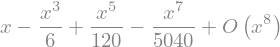

In [15]:
print(f)
series(f,x,0,8)

Compute Taylor expansion of $h(x)$ around $x=0$

sin(cos(x))


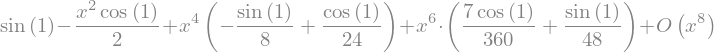

In [16]:
print(h)
series(h,x,0,8)

## Expression is not a function

In [17]:
p = (x + 1)/(x**2 + 2)

We cannot evaluate `p` at a numerical value. To do that, we can substitute the symbol `x` with a numerical value.

In [18]:
p.subs({'x':1})

In [19]:
p.subs({'x':1.0})

The result depends on whether we substitute with an integer or a float. You can substitute with a rational number like this

In [20]:
p.subs({'x':1//2})

For how to make python functions out of expressions, see below.

## Compute roots

Let us find roots of quadratic equation
$$
a x^2 + b x + c = 0
$$

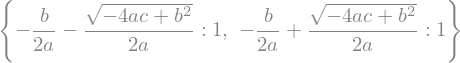

In [21]:
x, a, b, c = symbols('x a b c')
eq = a*x**2 + b*x + c
roots(eq,x)

In [22]:
x, a = symbols('x a')
eq = (x - a)**2
roots(eq,x)

## Expand, factor, simplify

In [23]:
x, a = symbols('x a')
expand((x-a)**2)

In [24]:
factor(x**2 - 2*a*x + a**2)

In [25]:
f = (x + x**2)/(x*sin(x)**2 + x*cos(x)**2)
simplify(f)

## Get Latex code

In [26]:
x = symbols('x')
p = (cos(x)-sin(x))**3
expand(p)

In [27]:
print_latex(expand(p))

- \sin^{3}{\left(x \right)} + 3 \sin^{2}{\left(x \right)} \cos{\left(x \right)} - 3 \sin{\left(x \right)} \cos^{2}{\left(x \right)} + \cos^{3}{\left(x \right)}


## Solve a linear system
$$
x_1 + x_2 = a, \qquad x_1 - x_2 = b
$$

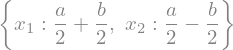

In [28]:
x1, x2, a, b = symbols('x1 x2 a b')
e1 = x1 + x2 - a
e2 = x1 - x2 - b
solve([e1, e2],[x1,x2])

We can capture the result as a dictionary.

In [29]:
r = solve([e1, e2],[x1,x2])
print('x1 = ', r[x1])
print('x2 = ', r[x2])

x1 =  a/2 + b/2
x2 =  a/2 - b/2


## Example: create Python function from sympy expression

Lets first define a function and get its derivative.

In [30]:
x = symbols('x')
f = x * sin(50*x) * exp(x)
g = diff(f,x)

We cannot evaluate `f` and `g` since they are not python functions. We first create Python functions out of the symbolic expressions and then plot them.

In [31]:
ffun = lambdify(x,f)
gfun = lambdify(x,g)

We can now evaluate these functions at some argument

In [32]:
print('f(1) =',ffun(1.0))
print('g(1) =',gfun(1.0))

f(1) = -0.7132087970679899
g(1) = 129.72606342238427


We can now use these to plot graphs of the functions

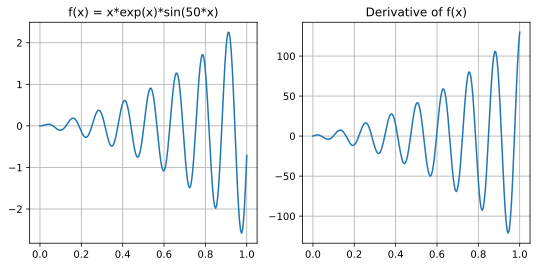

In [33]:
xx = np.linspace(0.0,1.0,200)
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(xx,ffun(xx))
plt.grid(True)
plt.title('f(x) = '+str(f))
plt.subplot(122)
plt.plot(xx,gfun(xx))
plt.grid(True)
plt.title('Derivative of f(x)');

## Example: Truncation error of FD scheme

Approximate second derivative using finite difference scheme
$$
f''(x) \approx \frac{f(x-h) - 2 f(x) + f(x+h)}{h^2}
$$
We perform Taylor expansion around $x$ to find the error in this approximation

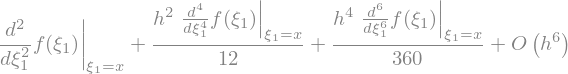

In [34]:
x, h = symbols("x,h")
f = Function("f")
T = lambda h: (f(x-h) - 2*f(x) + f(x+h))/(h**2)
series(T(h), h, x0=0, n=6)

The above result shows that the FD formula is equal to
$$
\frac{f(x-h) - 2 f(x) + f(x+h)}{h^2} = f''(x) + \frac{h^2}{12} f^{(4)}(x) + \frac{h^4}{360} f^{(6)}(x) + O(h^6)
$$
The leading error term is $O(h^2)$ 
$$
\frac{f(x-h) - 2 f(x) + f(x+h)}{h^2} - f''(x) = \frac{h^2}{12} f^{(4)}(x) + \frac{h^4}{360} f^{(6)}(x) + O(h^6)
$$
so that the formula is second order accurate.